# Import libraries and files

In [174]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [175]:
songs_df = pd.read_csv('df_audio_features_10.csv')

In [176]:
#Set name of song and artist as index and drop columns without values
songs_df['song_artist'] = songs_df['song_name'] + ' - ' + songs_df['artist']
songs_df = songs_df.set_index('song_artist')
songs_df = songs_df.drop(['song_name', 'artist', 'id', 'html'], axis=1)
songs_df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_artist,,,,,,,,,,,,,
My Band - D12,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.1160,0.844,120.014,298773,4
The Real Slim Shady - Eminem,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200,4
Águas De Março - Antônio Carlos Jobim,0.642,0.339,3,-15.503,1,0.1400,0.8540,0.000000,0.1050,0.491,143.418,212400,4


## Dataframe with Distances but without Scaling

In [177]:
# Calculate the Euclidean distances between all pairs of songs in the DataFrame
distances = pairwise_distances(songs_df, metric='euclidean')

# Create a Pandas DataFrame from the distances
songs_distances_df = pd.DataFrame(distances,
                                      index=songs_df.index,
                                      columns=songs_df.index,)

# Display the Euclidean distances DataFrame
songs_distances_df.astype(int).head(3)

song_artist,My Band - D12,The Real Slim Shady - Eminem,Águas De Março - Antônio Carlos Jobim,The Girl From Ipanema - Stan Getz,"Paint It, Black - The Rolling Stones",Sultans Of Swing - Dire Straits,Space Raiders - Charlotte de Witte Remix - Eats Everything,In Silence - Amelie Lens,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby] - Johannes Brahms",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 - Frédéric Chopin
song_artist,,,,,,,,,,
My Band - D12,0,14573,86373,19214,96506,49851,139947,94967,188973,30346
The Real Slim Shady - Eminem,14573,0,71800,33787,81933,64424,154520,109540,174400,15773
Águas De Março - Antônio Carlos Jobim,86373,71800,0,105587,10133,136224,226320,181340,102600,56027


## Min and Max Scaling

In [178]:
# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas")

# Scale the DataFrame
songs_df_minmax = scaler.fit_transform(songs_df)

In [179]:
songs_df_minmax.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_artist,,,,,,,,,,,,,
My Band - D12,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
The Real Slim Shady - Eminem,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
Águas De Março - Antônio Carlos Jobim,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0


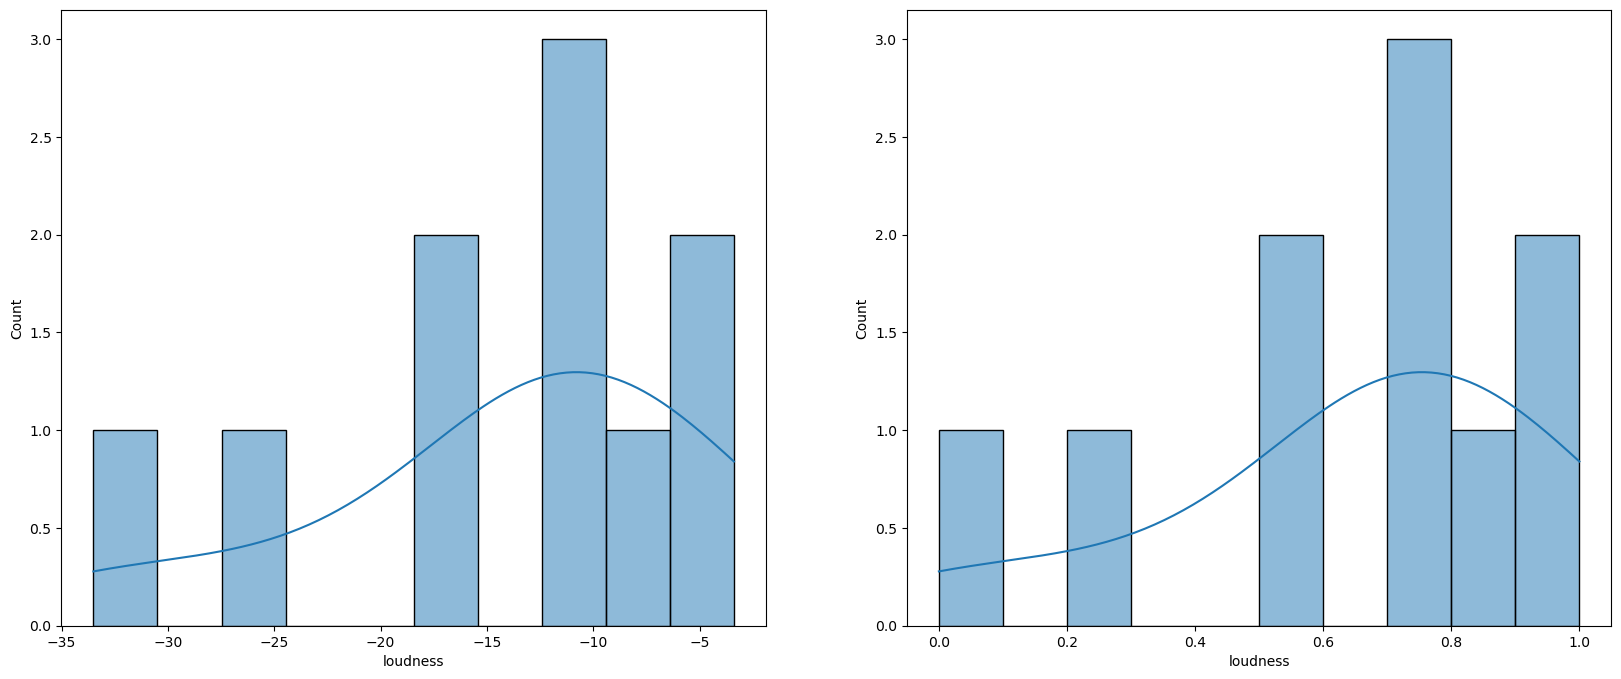

In [180]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(songs_df.iloc[:,3], bins=10, kde=True, ax=ax1);
sns.histplot(songs_df_minmax.iloc[:,3], bins=10, kde=True, ax=ax2);

plt.show()

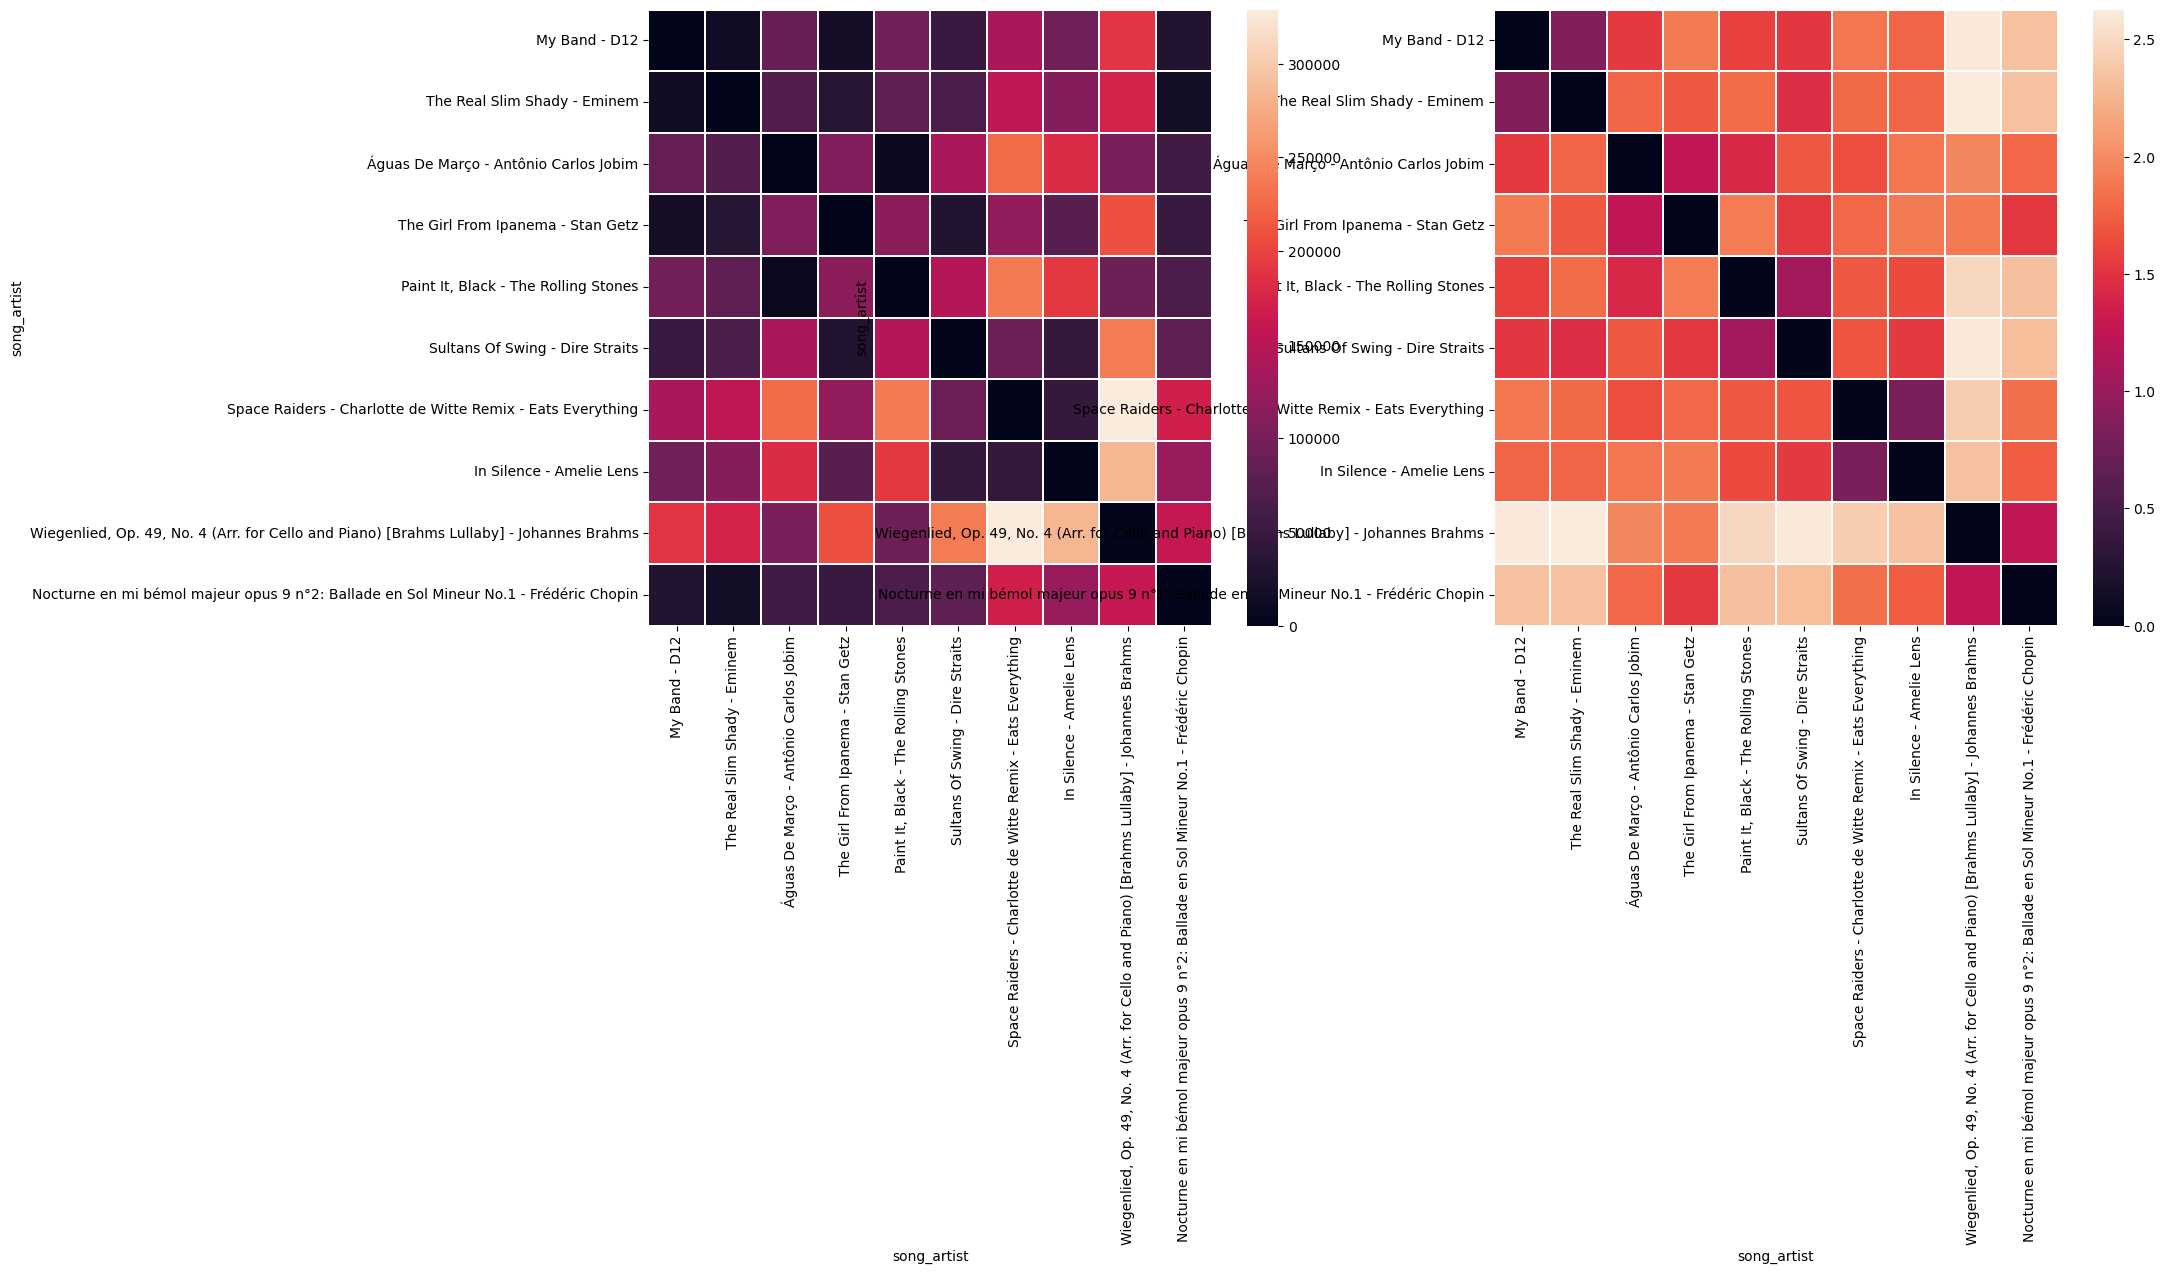

In [181]:
# Making the DataFrame for the MinMaxed heatmap
songs_df_minmax_distances = pd.DataFrame(pairwise_distances(songs_df_minmax),
                                             index=songs_df.index,
                                             columns=songs_df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(songs_df_minmax_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
#ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
#ax2.set_title('Including age - everything MinMax scaled')

#plt.show()

## Standard Scaler

In [182]:
# Create a StandardScaler object
scaler = StandardScaler().set_output(transform="pandas")

# Scale the foods_df DataFrame
songs_df_standard = scaler.fit_transform(songs_df)

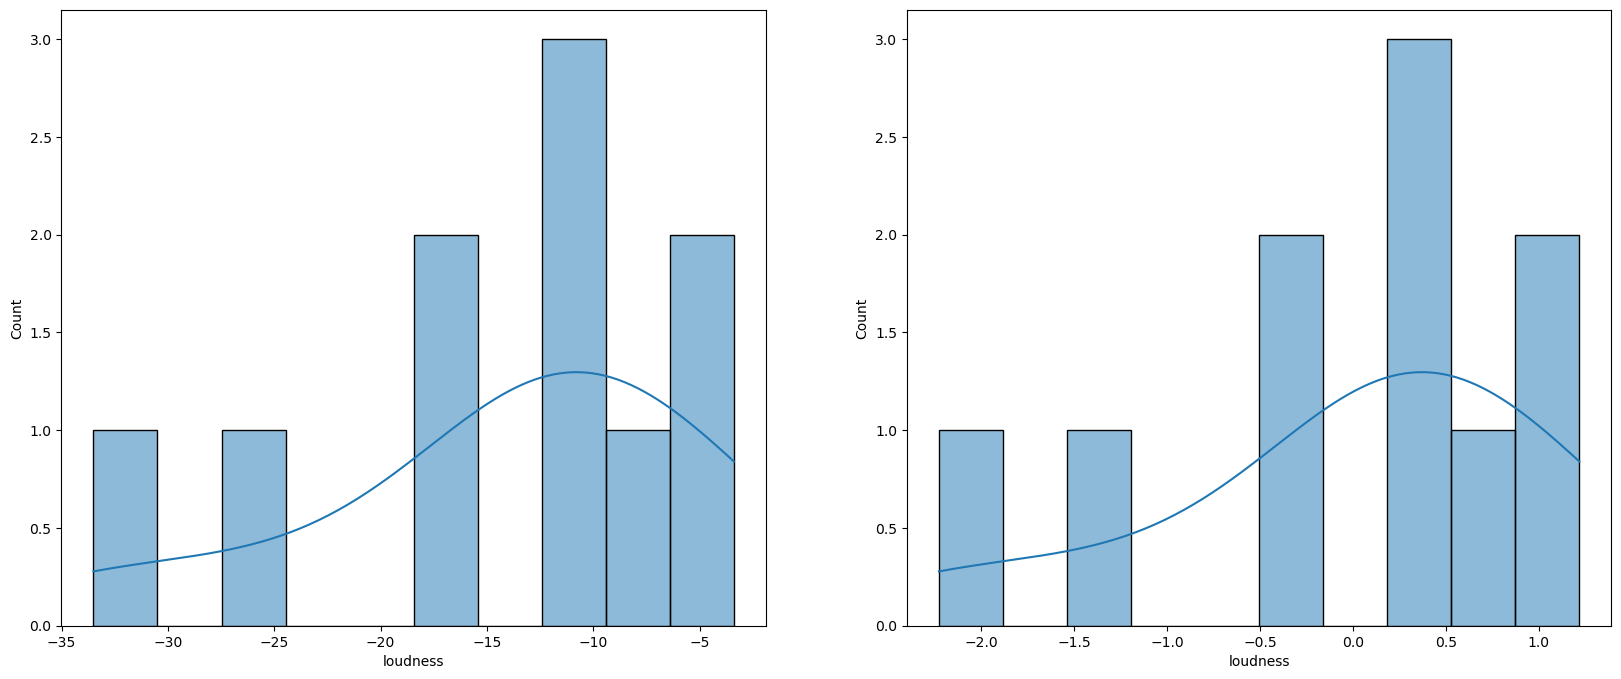

In [183]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(songs_df.iloc[:,3], bins=10, kde=True, ax=ax1);
sns.histplot(songs_df_standard.iloc[:,3], bins=10, kde=True, ax=ax2);

plt.show()

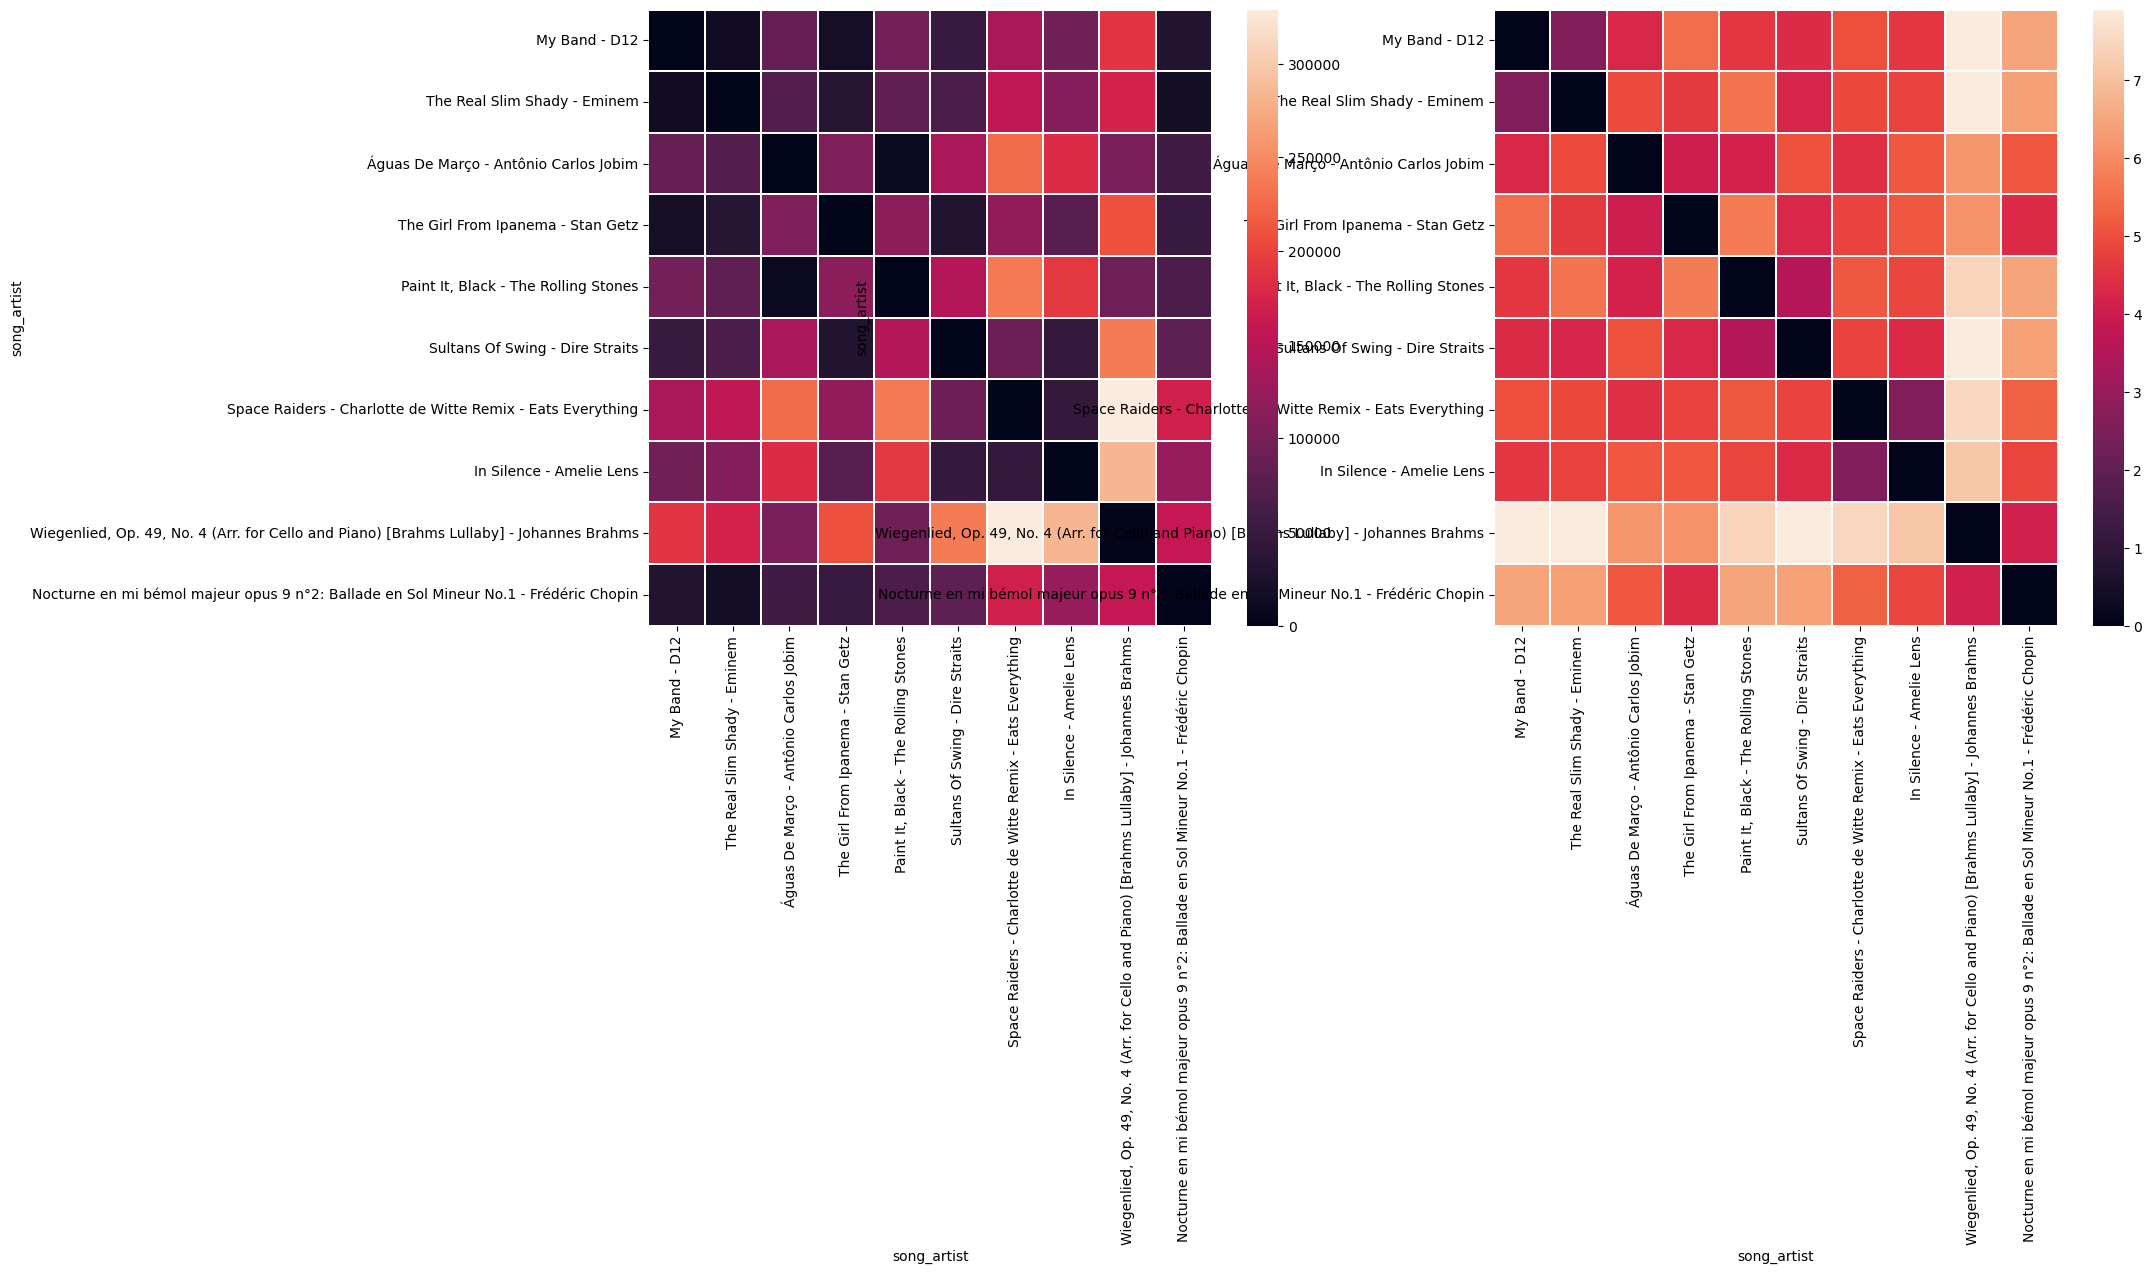

In [184]:
# Making the DataFrame for the Standard heatmap
songs_df_standard_distances = pd.DataFrame(pairwise_distances(songs_df_standard),
                                           index=songs_df.index,
                                           columns=songs_df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(songs_df_standard_distances, ax=ax2, linewidths=.2);


plt.show()

## Robust Scaler

In [185]:
# Create a RobustScaler object
scaler = RobustScaler().set_output(transform="pandas")

# Scale the foods_df DataFrame
songs_df_robust = scaler.fit_transform(songs_df)

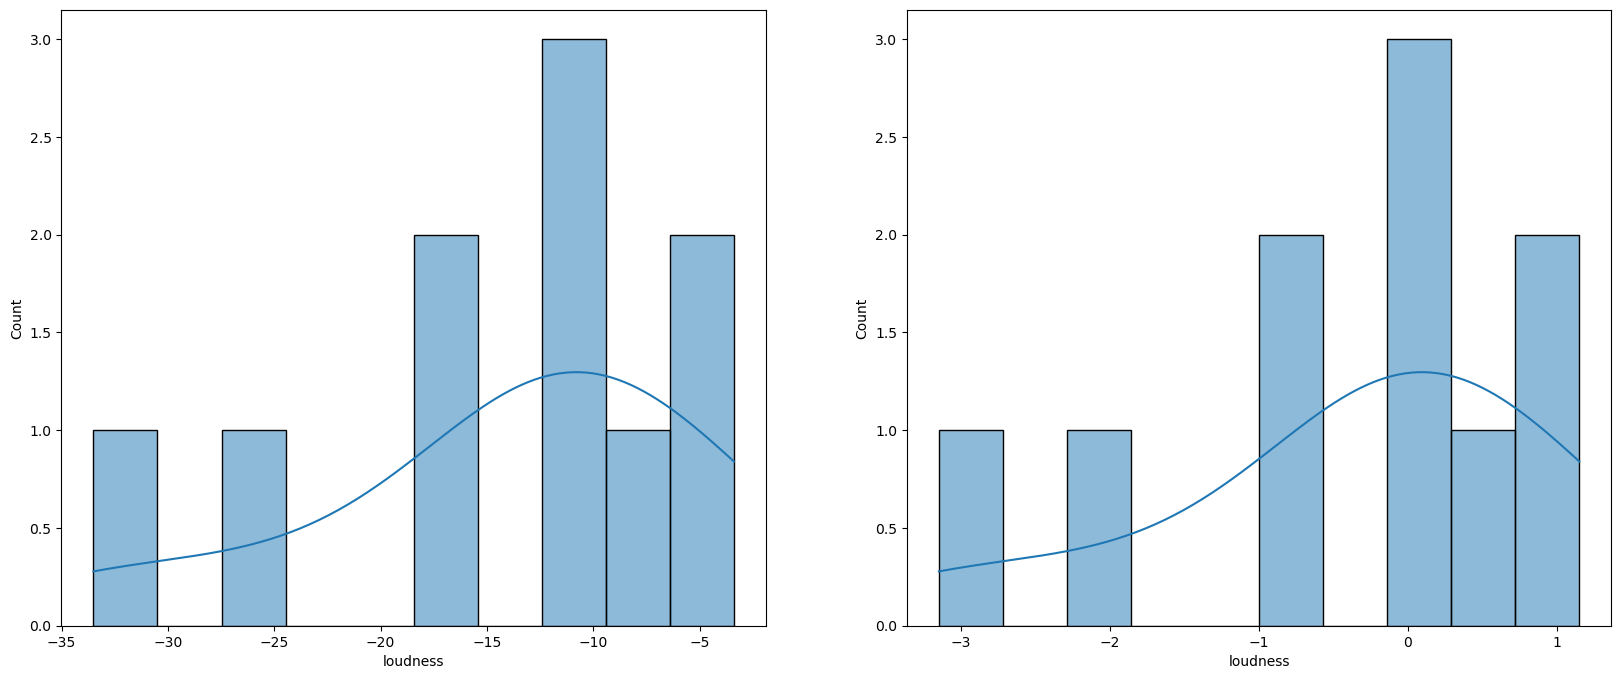

In [186]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(songs_df.iloc[:,3], bins=10, kde=True, ax=ax1);
sns.histplot(songs_df_robust.iloc[:,3], bins=10, kde=True, ax=ax2);

plt.show()

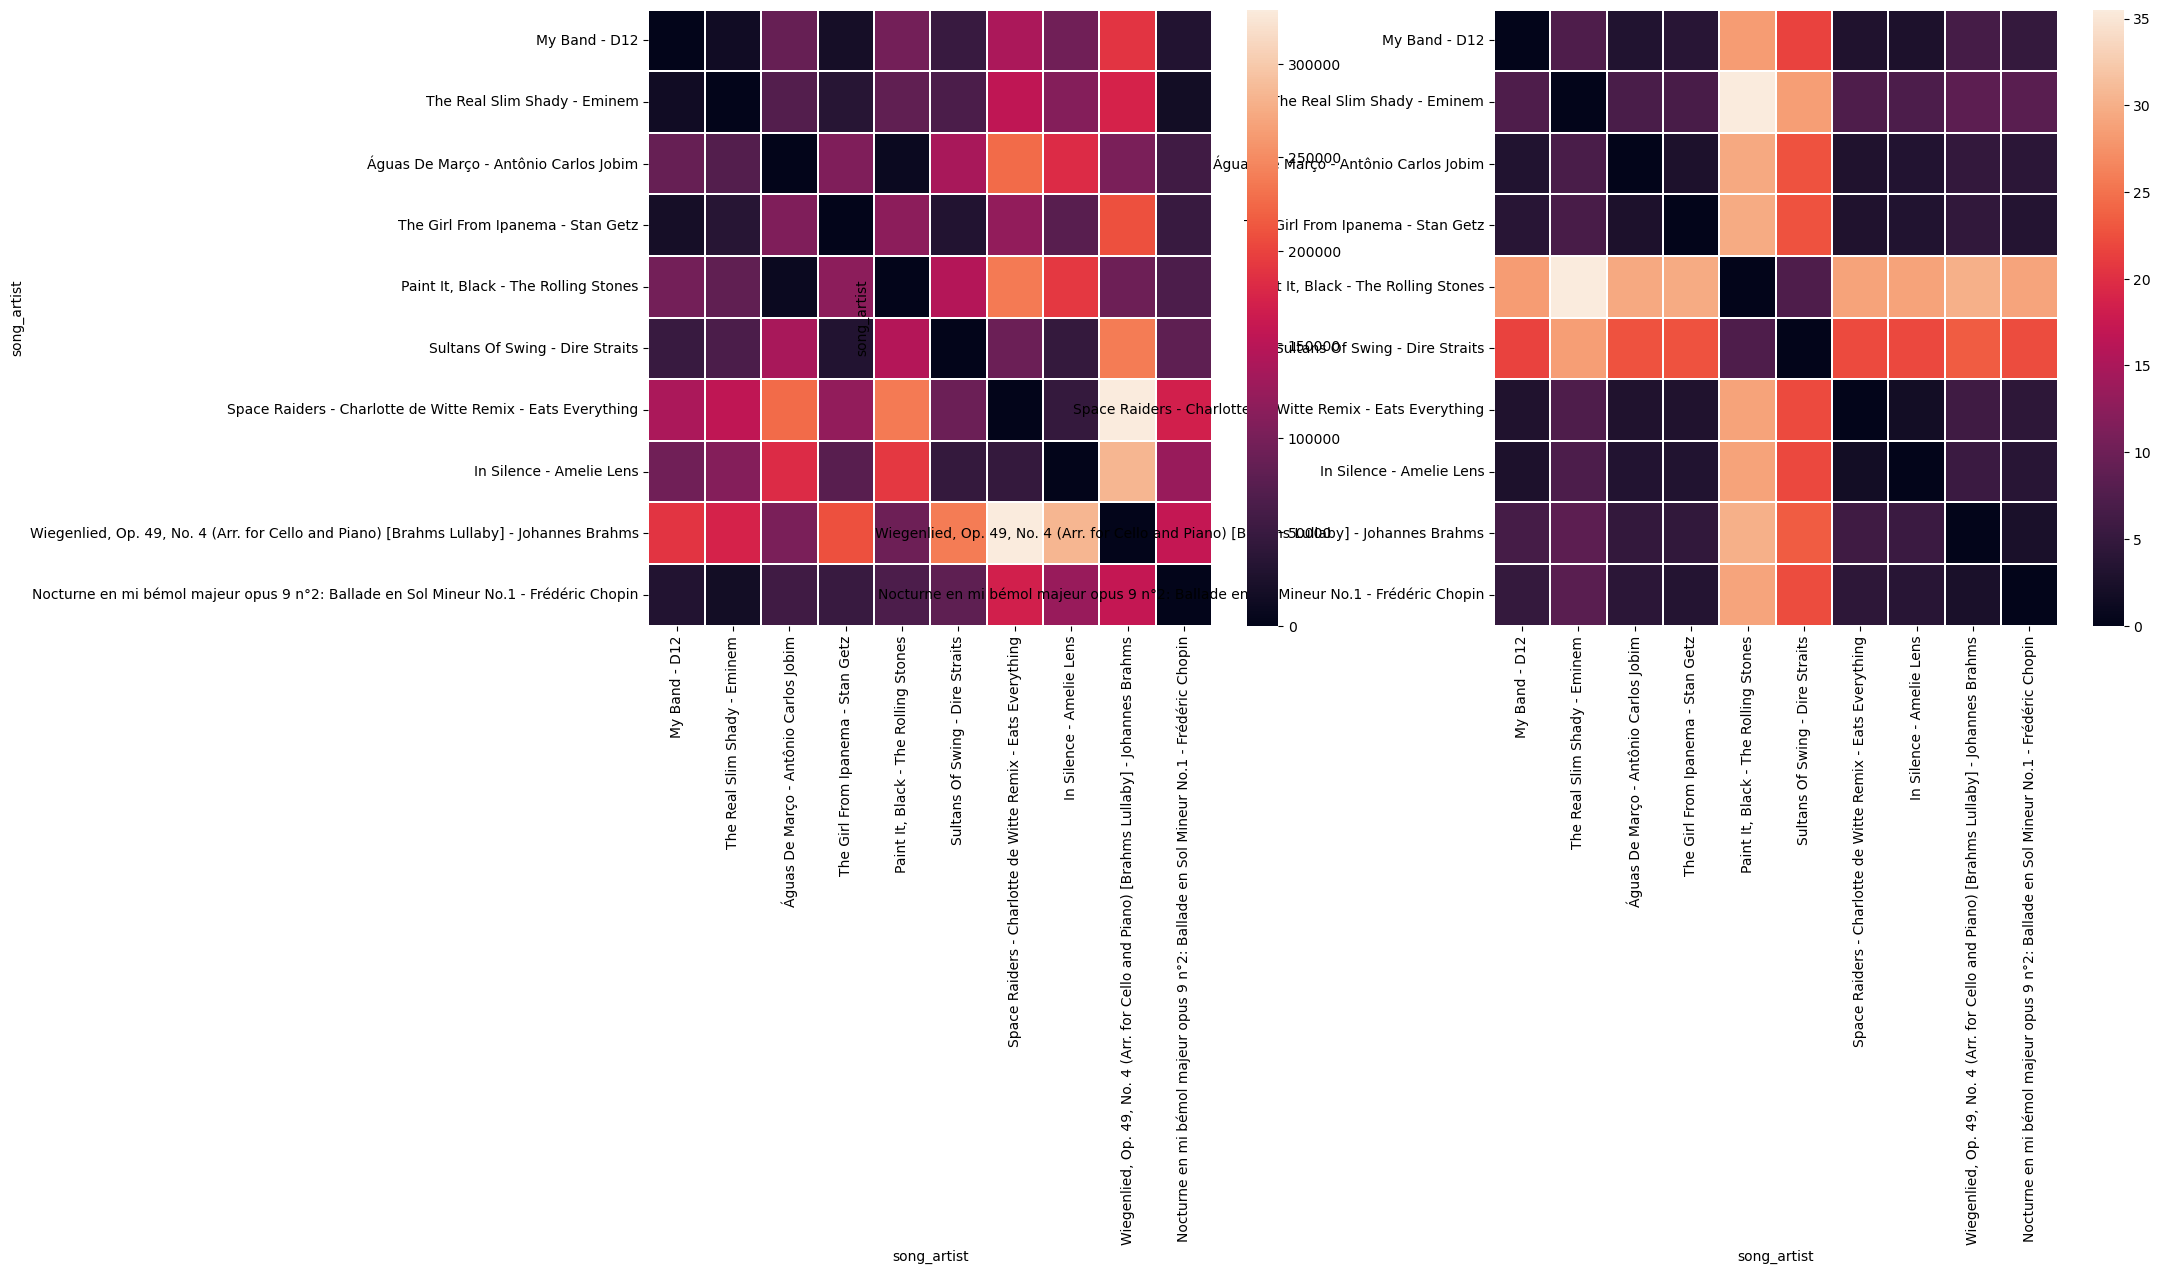

In [187]:
# Making the DataFrame for the Standard heatmap
songs_df_robust_distances = pd.DataFrame(pairwise_distances(songs_df_robust),
                                           index=songs_df.index,
                                           columns=songs_df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(songs_df_robust_distances, ax=ax2, linewidths=.2);


plt.show()

## Quantile transformer

In [188]:
# Number of samples
number_of_samples = songs_df.shape[0]

# Create a QuantileTransformer object
scaler = QuantileTransformer(n_quantiles = number_of_samples).set_output(transform="pandas")

# Transform the foods_df DataFrame
songs_df_quantile = scaler.fit_transform(songs_df)

In [189]:
songs_df_quantile.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_artist,,,,,,,,,,,,,
My Band - D12,0.888889,1.000000,0.000000,1.000000,0.0,0.666667,0.555556,0.222222,0.777778,0.888889,0.333333,0.555556,1.0
The Real Slim Shady - Eminem,1.000000,0.444444,0.888889,0.888889,0.0,0.555556,0.222222,0.000000,0.000000,0.777778,0.222222,0.444444,1.0
Águas De Março - Antônio Carlos Jobim,0.444444,0.333333,0.500000,0.333333,1.0,1.000000,0.666667,0.000000,0.277778,0.555556,0.777778,0.222222,1.0


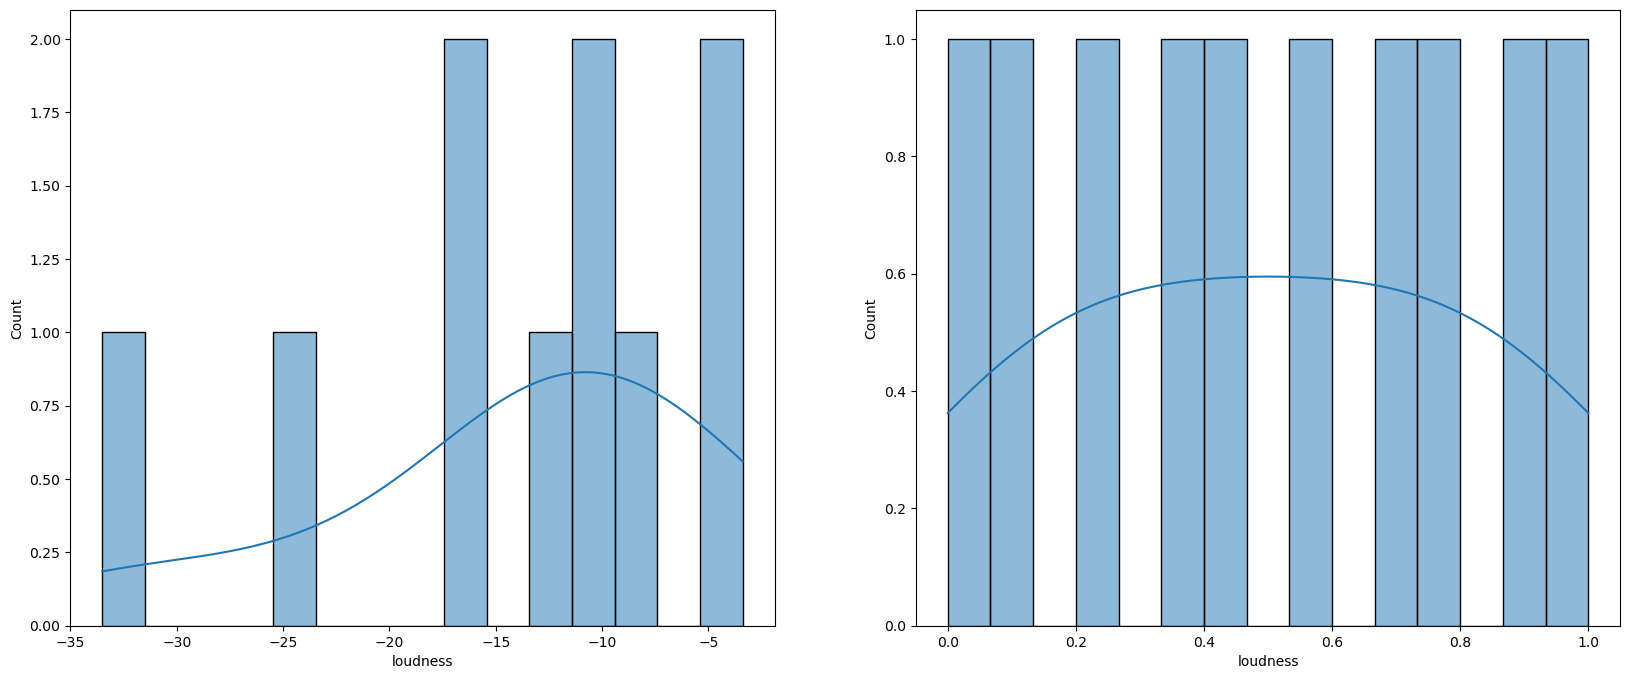

In [190]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(songs_df.iloc[:,3], bins=15, kde=True, ax=ax1);
sns.histplot(songs_df_quantile.iloc[:,3], bins=15, kde=True, ax=ax2);

plt.show()

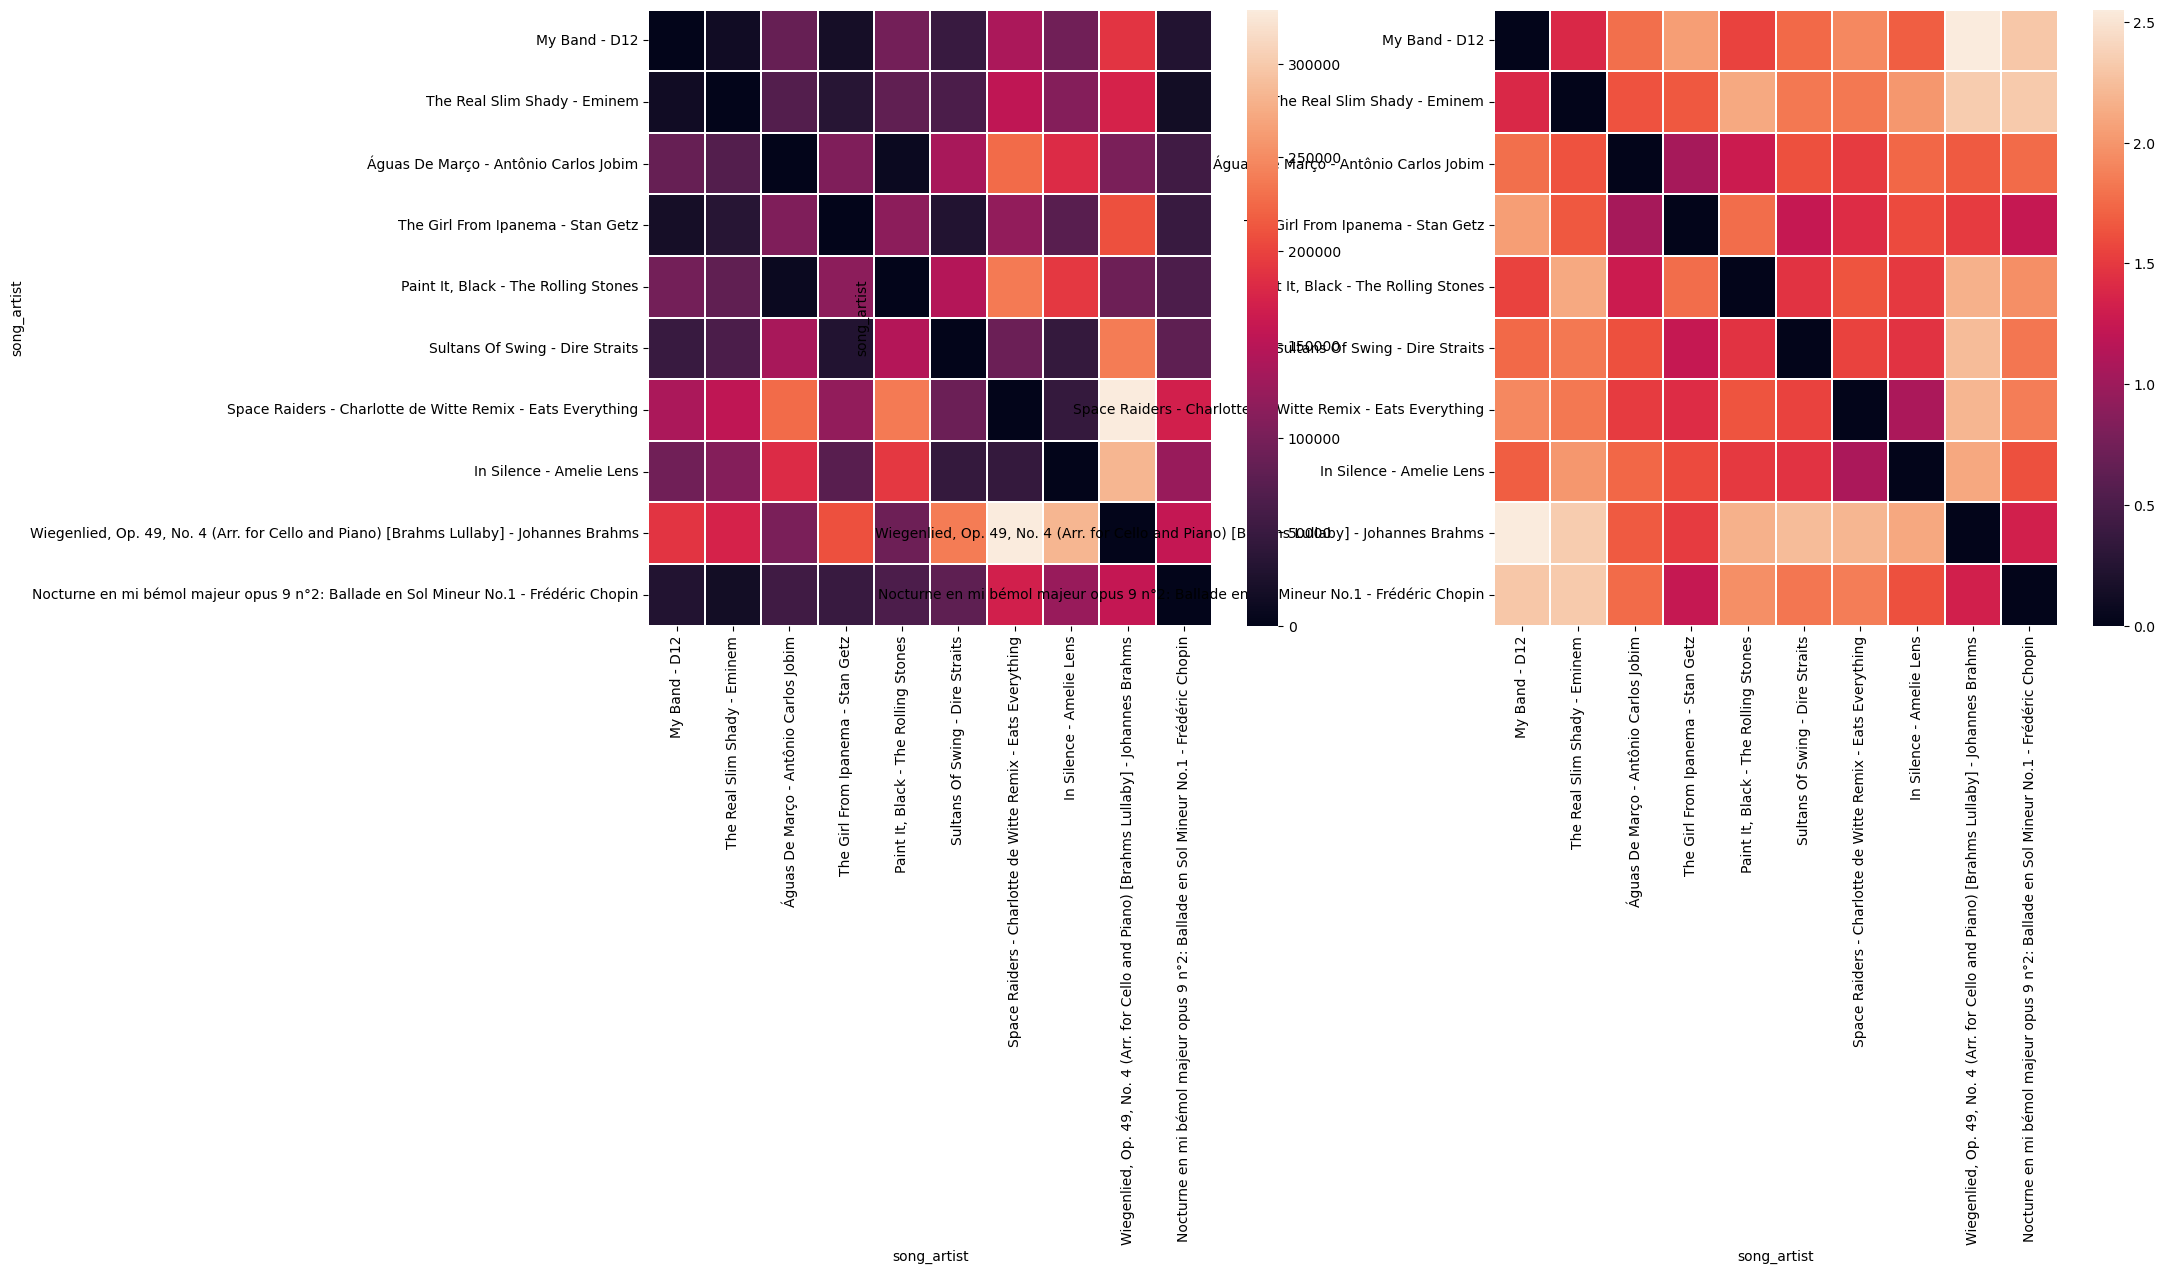

In [191]:
# Making the DataFrame for the Standard heatmap
songs_df_quantile_distances = pd.DataFrame(pairwise_distances(songs_df_quantile),
                                           index=songs_df.index,
                                           columns=songs_df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(songs_df_quantile_distances, ax=ax2, linewidths=.2);


plt.show()

## Power transformer

In [192]:
# Create a PowerTransformer object
scaler = PowerTransformer().set_output(transform="pandas")

# Transform the foods_df DataFrame
songs_df_power = scaler.fit_transform(songs_df)

In [193]:
songs_df_power.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_artist,,,,,,,,,,,,,
My Band - D12,1.075317,1.078305,-1.323316,1.669676,-2.0,0.701909,0.374746,-0.851856,-0.078481,1.224185,-0.153505,0.097165,0.333333
The Real Slim Shady - Eminem,1.730514,0.308997,0.856157,1.413297,-2.0,-0.081333,-0.970704,-0.851869,-1.947847,1.000002,-0.666126,-0.064355,0.333333
Águas De Março - Antônio Carlos Jobim,-0.100289,-0.718947,0.012636,-0.404512,0.5,1.644350,1.020441,-0.851869,-0.291008,0.208391,0.806331,-0.839203,0.333333


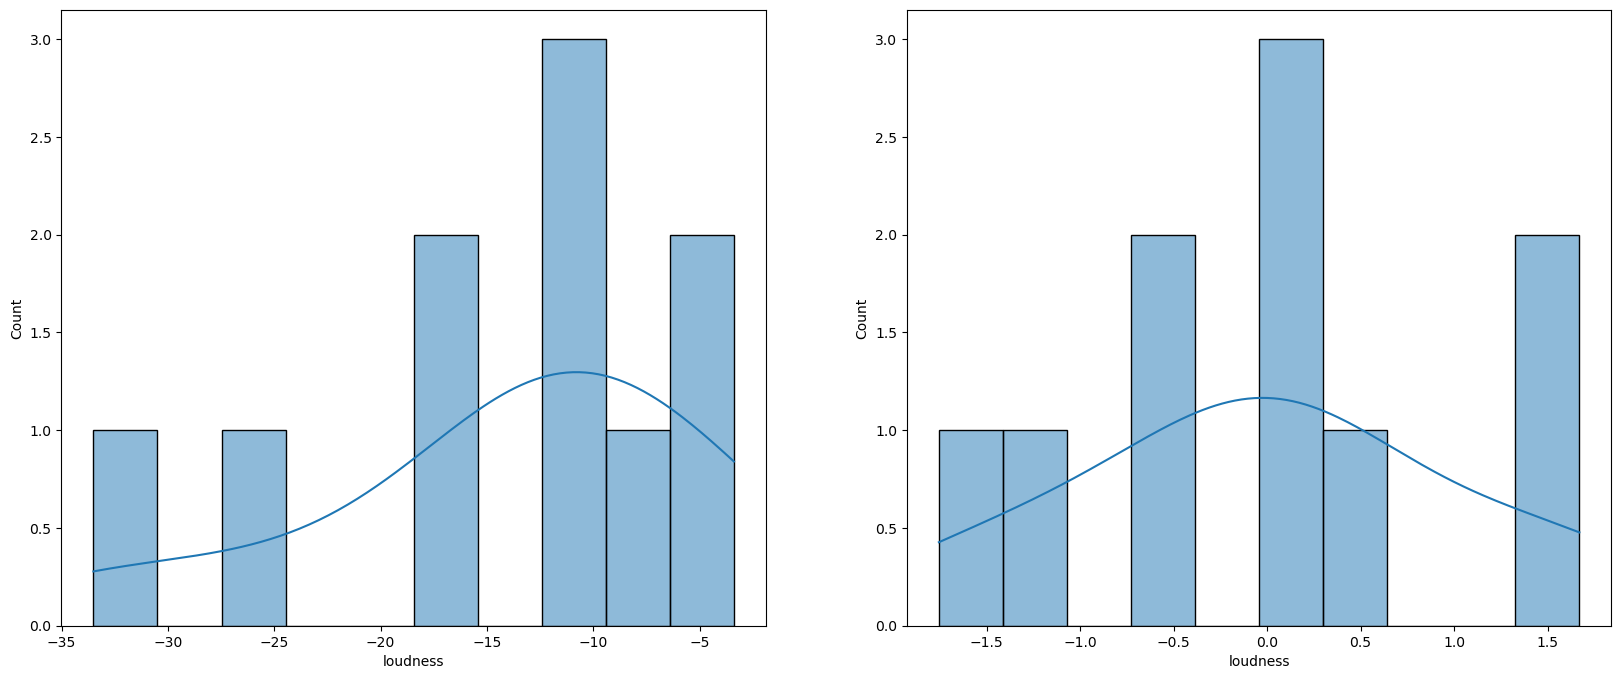

In [194]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(songs_df.iloc[:,3], bins=10, kde=True, ax=ax1);
sns.histplot(songs_df_power.iloc[:,3], bins=10, kde=True, ax=ax2);

plt.show()

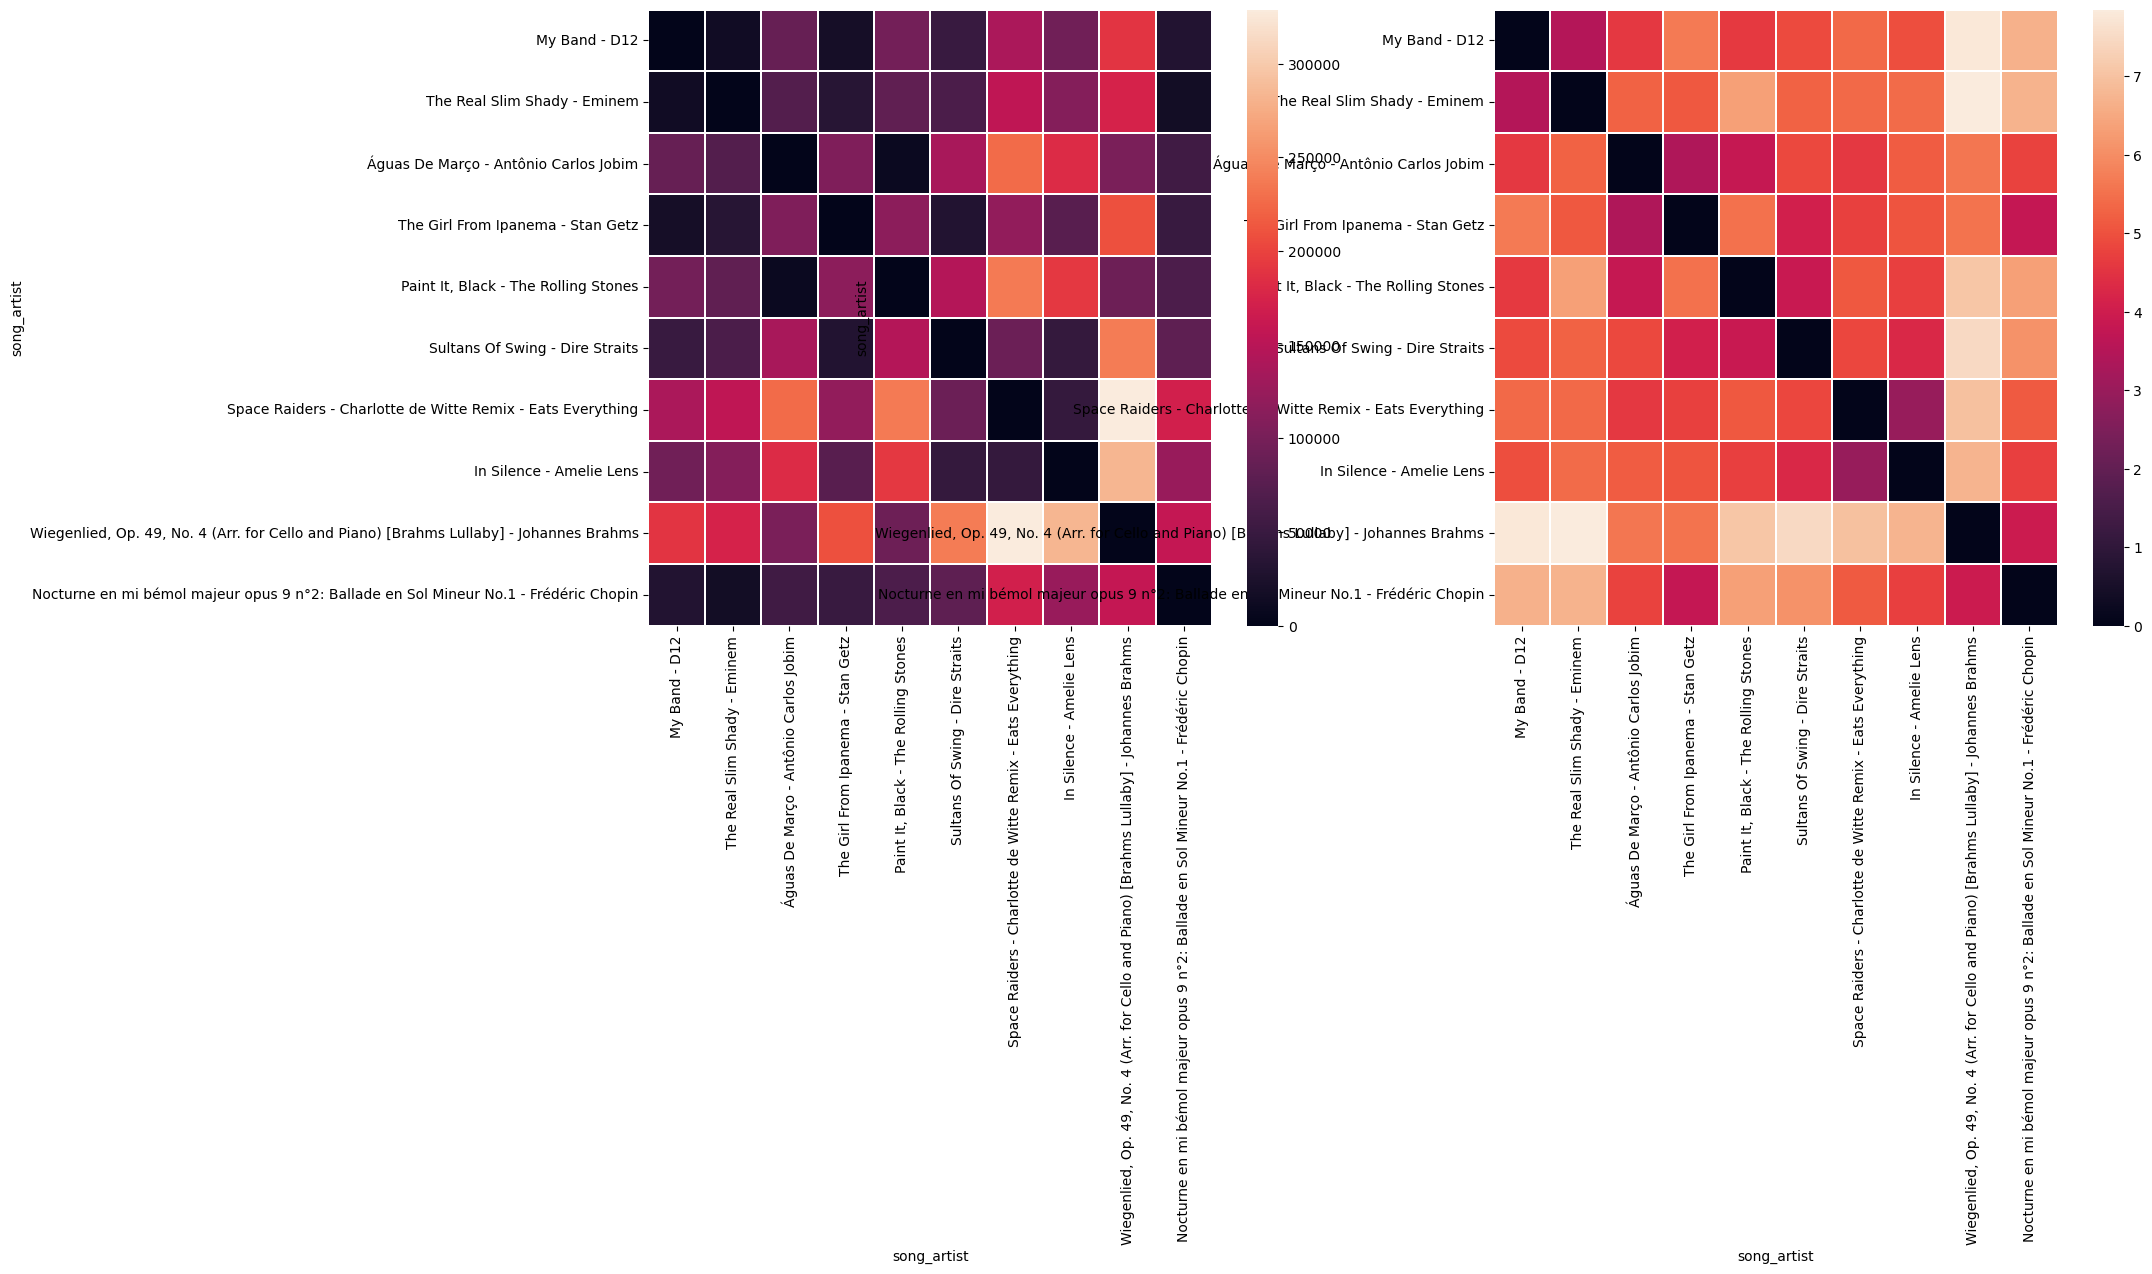

In [195]:
# Making the DataFrame for the Standard heatmap
songs_df_power_distances = pd.DataFrame(pairwise_distances(songs_df_power),
                                           index=songs_df.index,
                                           columns=songs_df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(songs_df_power_distances, ax=ax2, linewidths=.2);


plt.show()

# Comparing all 6 Options

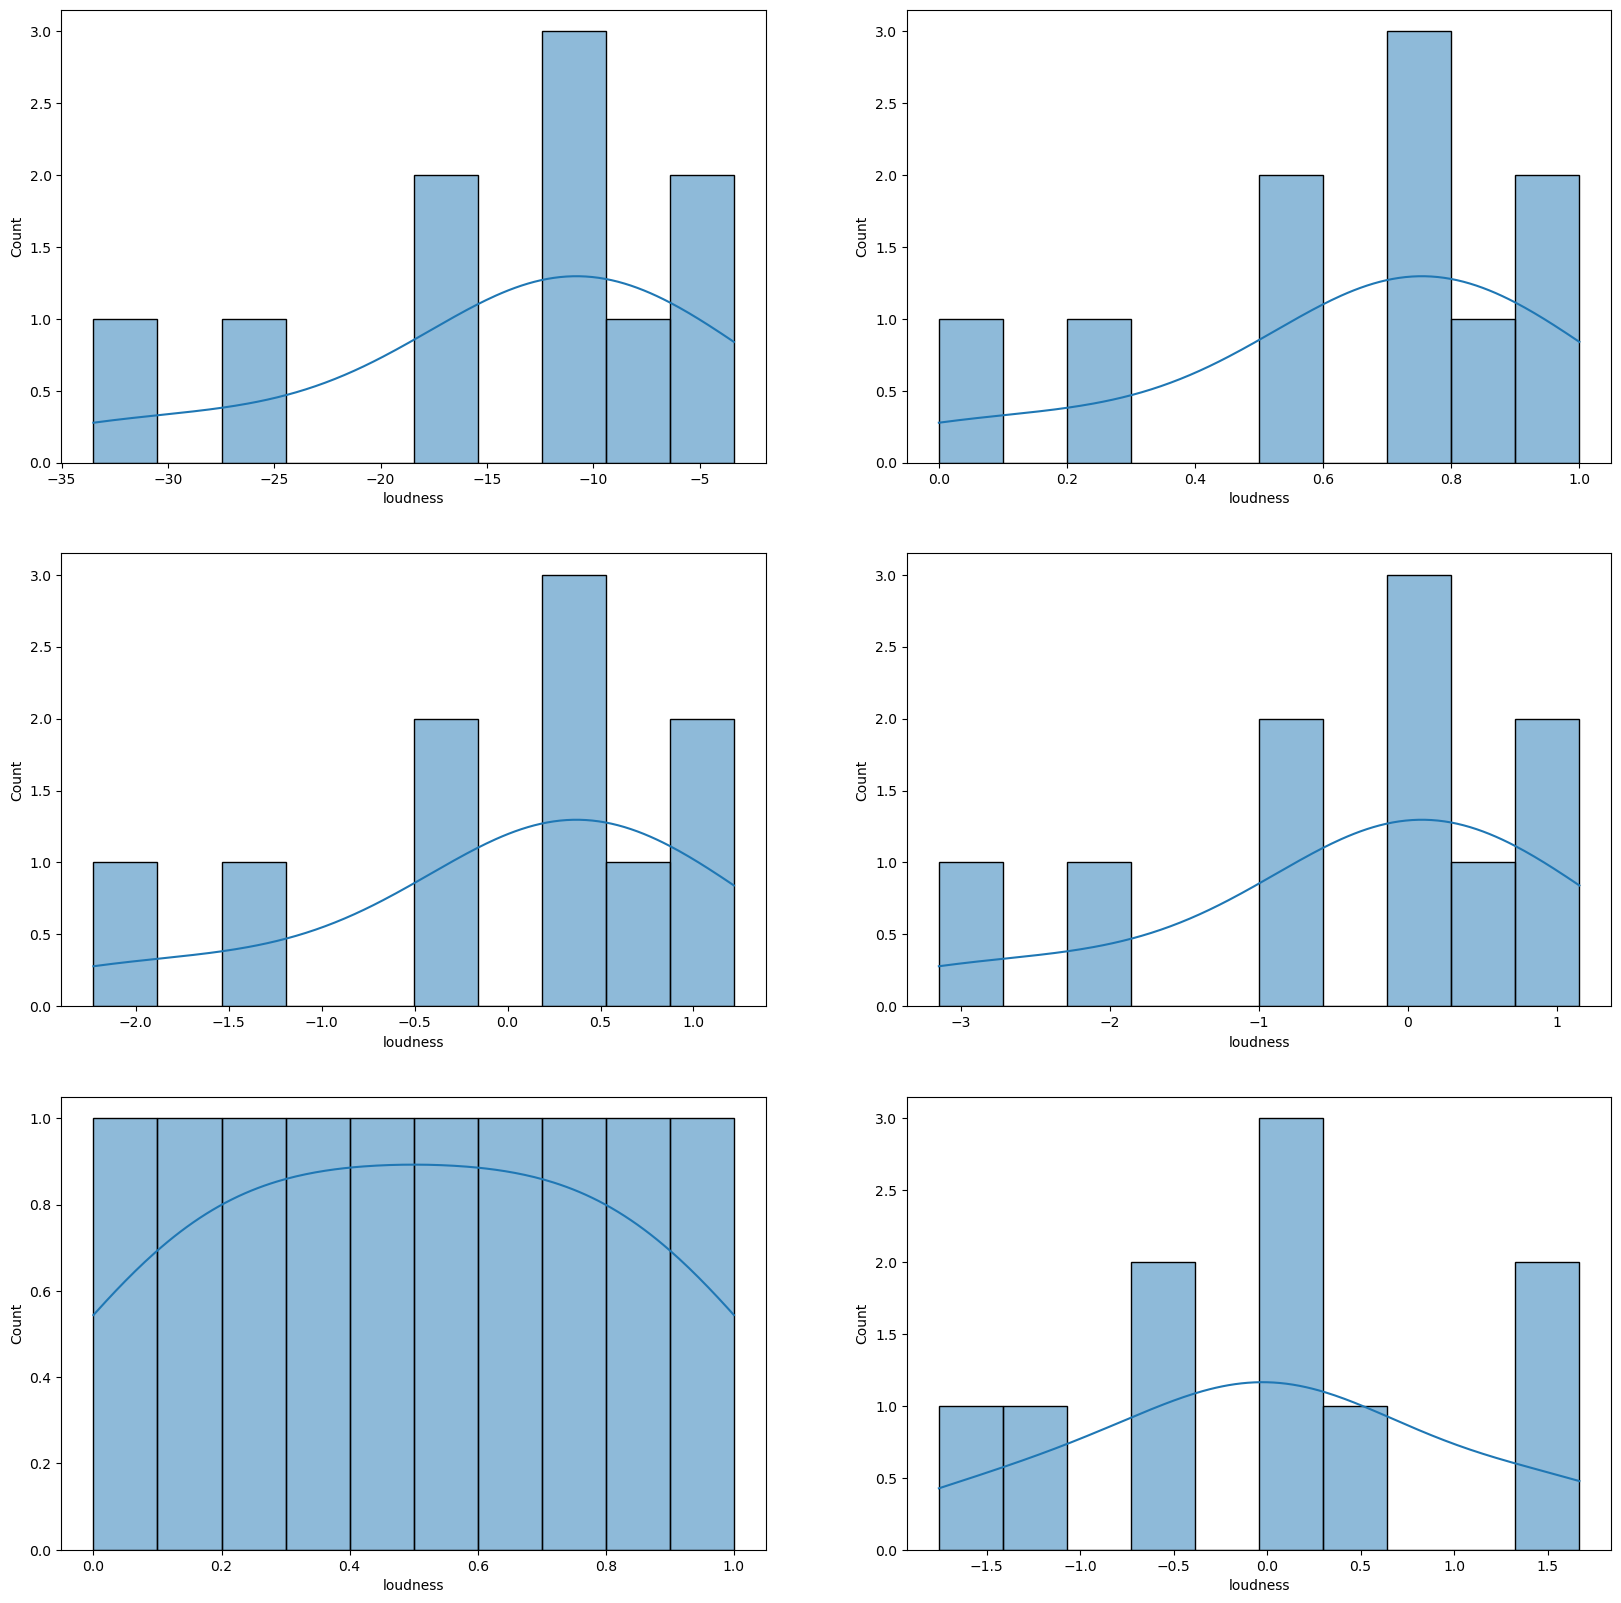

In [196]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.histplot(songs_df.iloc[:,3], bins=10, kde=True, ax=ax[0, 0]);
sns.histplot(songs_df_minmax.iloc[:,3], bins=10, kde=True, ax=ax[0, 1]);
sns.histplot(songs_df_standard.iloc[:,3], bins=10, kde=True, ax=ax[1, 0]);
sns.histplot(songs_df_robust.iloc[:,3], bins=10, kde=True, ax=ax[1, 1]);
sns.histplot(songs_df_quantile.iloc[:,3], bins=10, kde=True, ax=ax[2, 0]);
sns.histplot(songs_df_power.iloc[:,3], bins=10, kde=True, ax=ax[2, 1]);

plt.show()

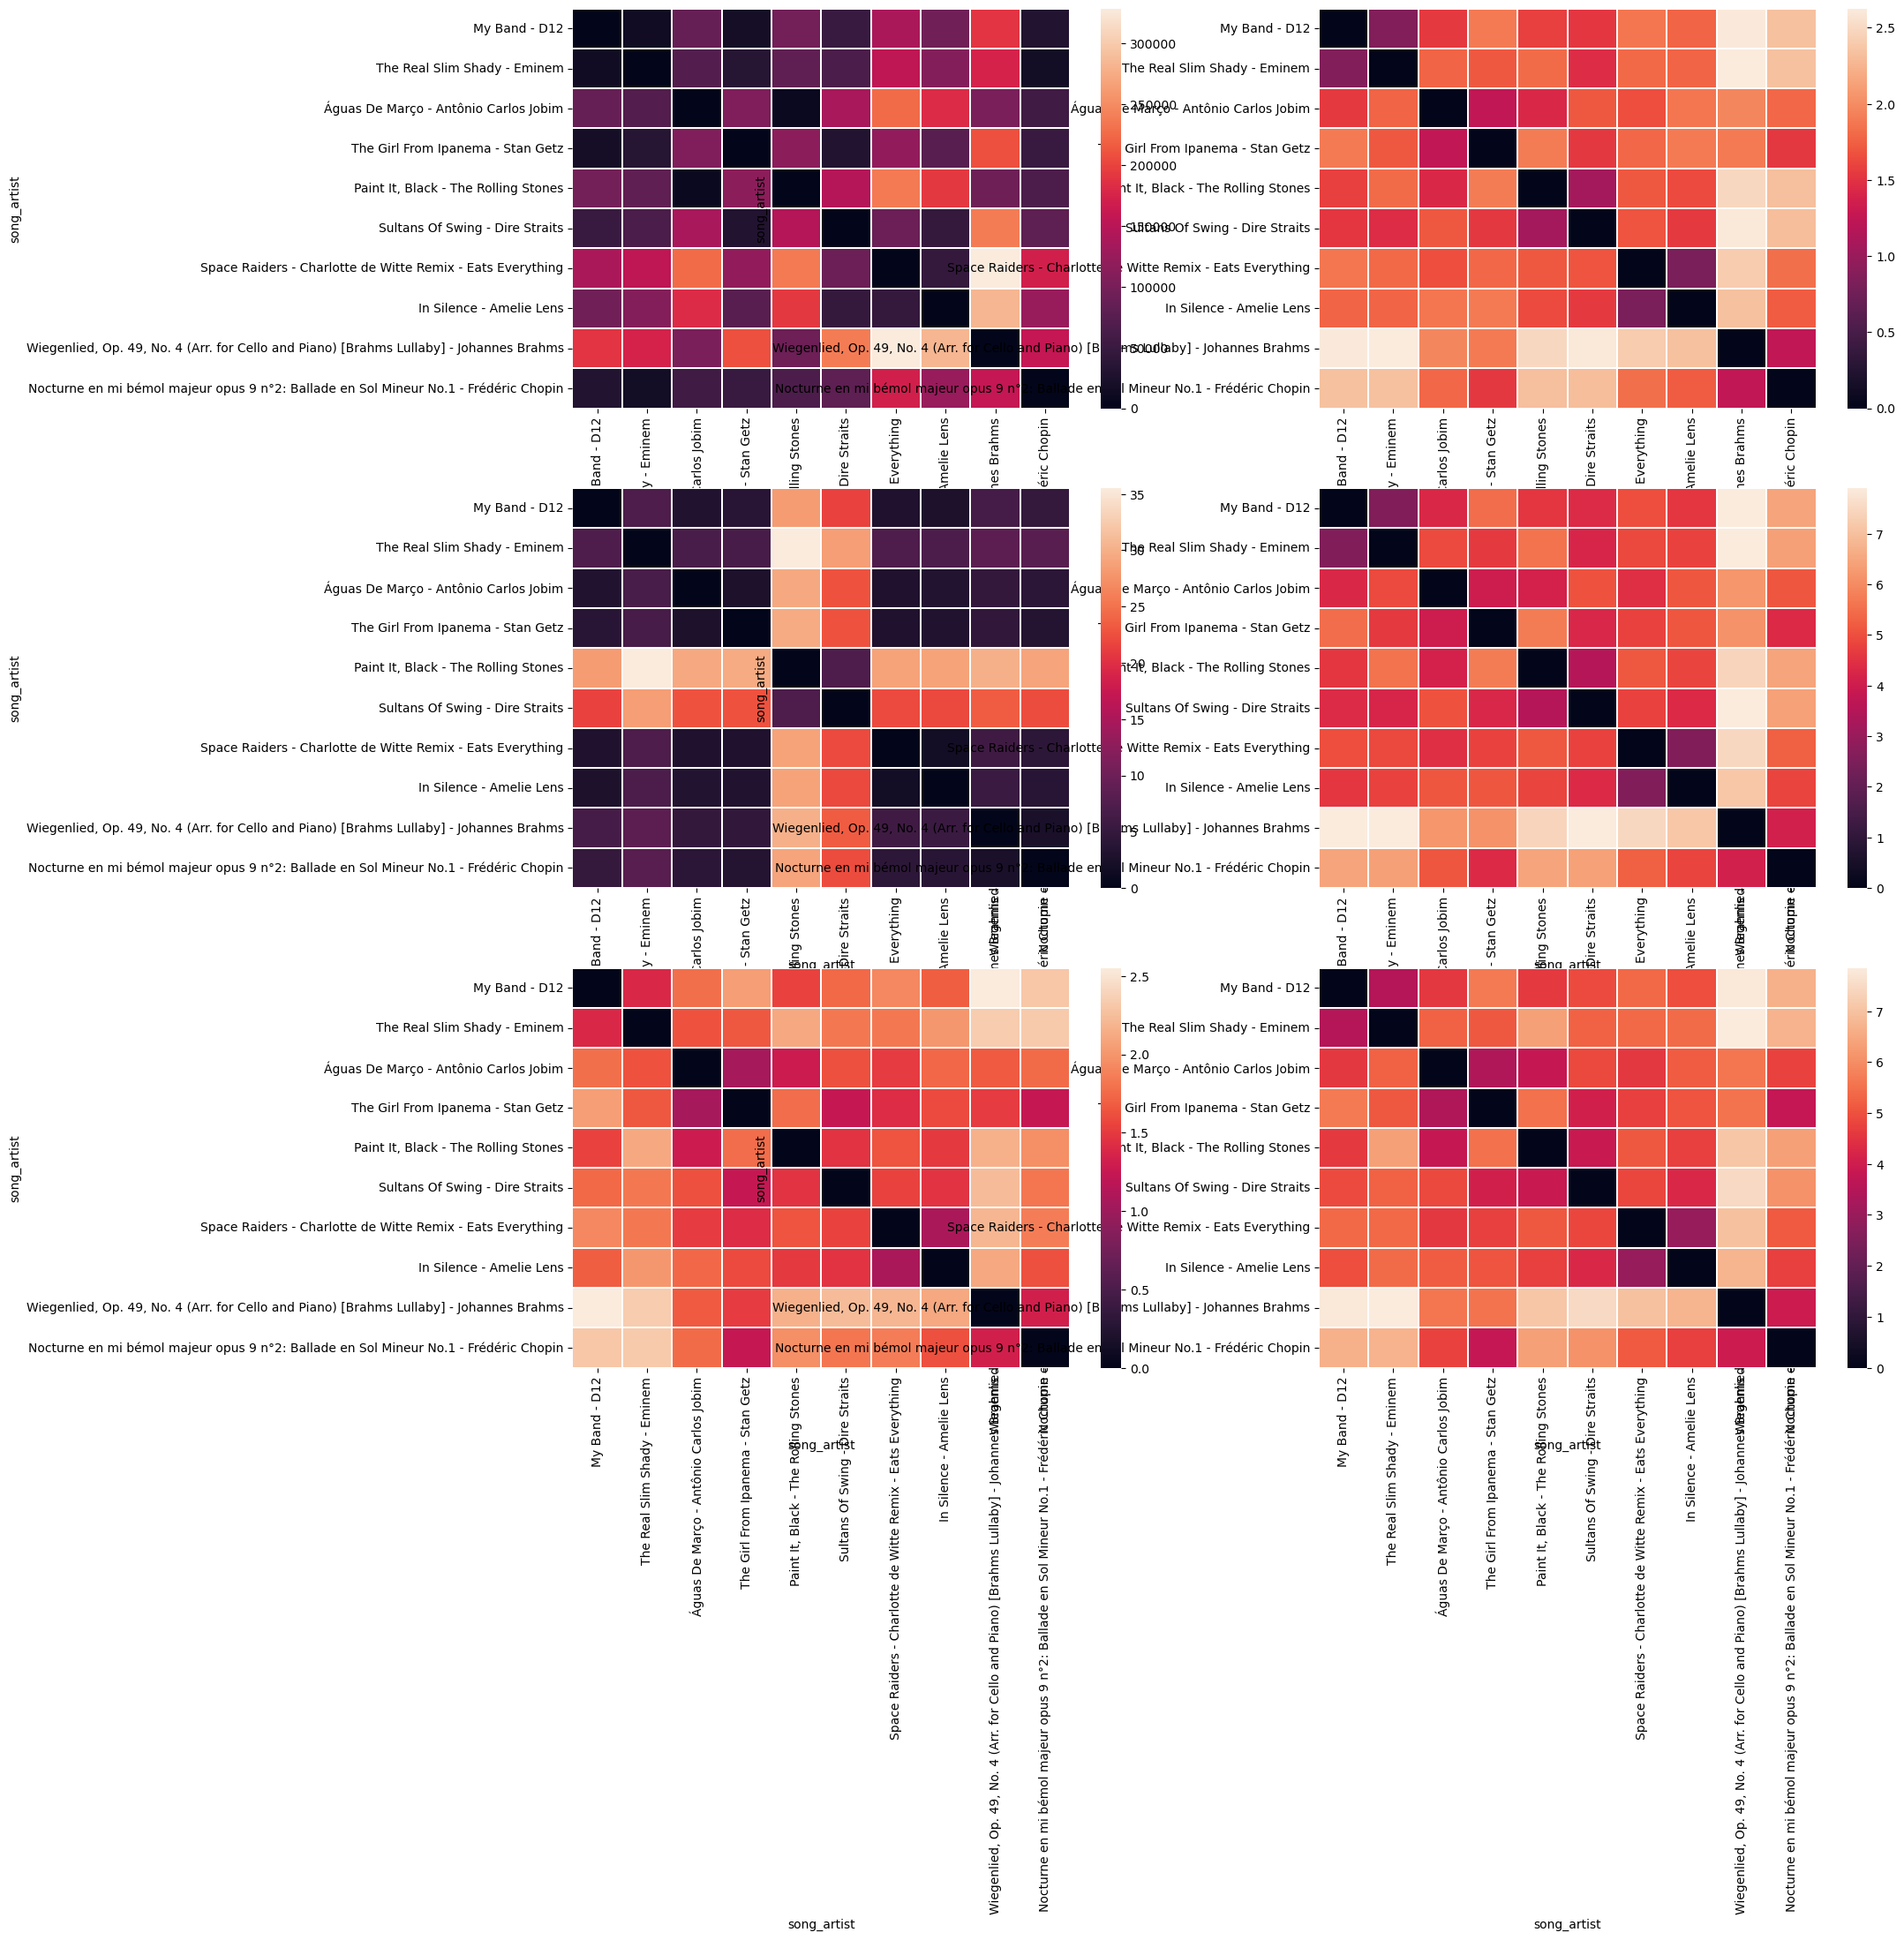

In [197]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.heatmap(songs_distances_df, ax=ax[0, 0], linewidths=.2);
sns.heatmap(songs_df_minmax_distances, ax=ax[0, 1], linewidths=.2);
sns.heatmap(songs_df_robust_distances, ax=ax[1, 0], linewidths=.2);
sns.heatmap(songs_df_standard_distances, ax=ax[1, 1], linewidths=.2);
sns.heatmap(songs_df_quantile_distances, ax=ax[2, 0], linewidths=.2);
sns.heatmap(songs_df_power_distances, ax=ax[2, 1], linewidths=.2);

plt.show()

## Assigning songs to groups based on their Euclidian distance with an unsupervised ML Algorithm (KMeans)

In [198]:
# 1. import the model
from sklearn.cluster import KMeans

In [199]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 5, n_init="auto", random_state=123)

In [200]:
# 3. let the model learn from our data
my_kmeans.fit(songs_df)

KMeans(n_clusters=5, n_init='auto', random_state=123)

In [202]:
# 4. get the prediction / cluster for each song (row)
my_kmeans.predict(songs_df)

array([4, 4, 1, 2, 1, 2, 0, 0, 3, 4], dtype=int32)

In [203]:
# 5. Create a new column with the result in our dataframe
songs_df["group"] = my_kmeans.predict(songs_df)

In [204]:
songs_df['group']

song_artist
My Band - D12                                                                              4
The Real Slim Shady - Eminem                                                               4
Águas De Março - Antônio Carlos Jobim                                                      1
The Girl From Ipanema - Stan Getz                                                          2
Paint It, Black - The Rolling Stones                                                       1
Sultans Of Swing - Dire Straits                                                            2
Space Raiders - Charlotte de Witte Remix - Eats Everything                                 0
In Silence - Amelie Lens                                                                   0
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby] - Johannes Brahms    3
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 - Frédéric Chopin       4
Name: group, dtype: int32

### Using scaled data with robust scaling

In [205]:
my_kmeans.fit(songs_df_robust)
my_kmeans.predict(songs_df_robust)
songs_df_robust["group"] = my_kmeans.predict(songs_df_robust)
songs_df_robust['group']

song_artist
My Band - D12                                                                              0
The Real Slim Shady - Eminem                                                               3
Águas De Março - Antônio Carlos Jobim                                                      0
The Girl From Ipanema - Stan Getz                                                          0
Paint It, Black - The Rolling Stones                                                       1
Sultans Of Swing - Dire Straits                                                            2
Space Raiders - Charlotte de Witte Remix - Eats Everything                                 0
In Silence - Amelie Lens                                                                   0
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby] - Johannes Brahms    4
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 - Frédéric Chopin       4
Name: group, dtype: int32

## Cluster Analysis - MinMax scaling method

Looking at the distances of the centroids - using the MinMax Method and the Quantile Transformer for scaling is leading to the best results

In [211]:
my_kmeans.fit(songs_df_minmax)
my_kmeans.predict(songs_df_minmax)
songs_df_minmax["group"] = my_kmeans.predict(songs_df_minmax)
songs_df_minmax['group']

song_artist
My Band - D12                                                                              3
The Real Slim Shady - Eminem                                                               3
Águas De Março - Antônio Carlos Jobim                                                      4
The Girl From Ipanema - Stan Getz                                                          4
Paint It, Black - The Rolling Stones                                                       1
Sultans Of Swing - Dire Straits                                                            1
Space Raiders - Charlotte de Witte Remix - Eats Everything                                 0
In Silence - Amelie Lens                                                                   0
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby] - Johannes Brahms    2
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 - Frédéric Chopin       2
Name: group, dtype: int32

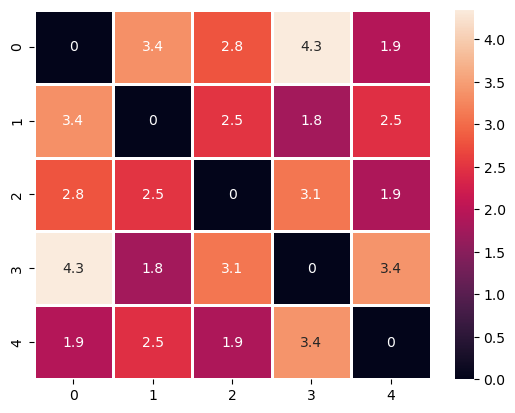

In [212]:
# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = my_kmeans.cluster_centers_

# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

# Plot distances on heatmap
sns.heatmap(centroid_distances,
            annot=True,
            linewidths=1);

In [213]:
songs_df_minmax.groupby(by="group").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
group,,,,,,,,,,,,,
0,0.730065,0.927439,0.214286,0.732470,1.0,0.385636,0.001186,0.968237,0.185520,0.079316,0.704847,0.931625,1.0
1,0.541830,0.935171,0.285714,0.792098,1.0,0.283166,0.052905,0.021435,0.902432,0.816919,0.945899,0.503604,1.0
2,0.132680,0.021869,0.285714,0.146165,1.0,0.123056,0.999493,0.826396,0.177036,0.093205,0.000242,0.241133,0.5
3,0.935948,0.888184,0.285714,0.985707,0.0,0.359561,0.263928,0.000001,0.099830,0.851928,0.522290,0.552373,1.0
4,0.598039,0.274983,0.642857,0.576245,1.0,0.537969,0.868776,0.000909,0.168552,0.435836,0.770332,0.472436,1.0


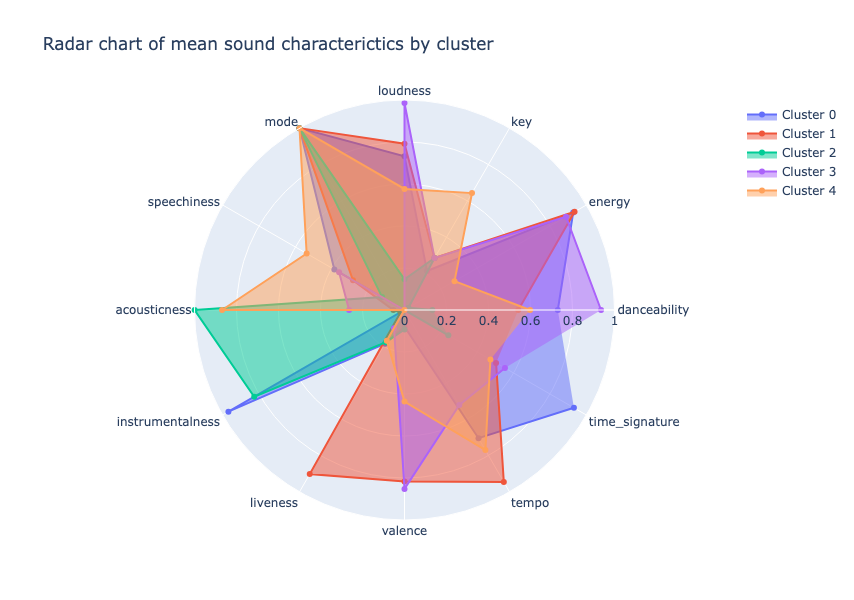

In [214]:
# State the label for each arm of the chart
categories = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(songs_df_minmax['group'].unique()):
  cluster_songs_means = go.Scatterpolar(
    r=songs_df_minmax.loc[songs_df_minmax["group"] == cluster].mean().tolist(),
    theta=categories,
    fill='toself',
    name=f'Cluster {cluster}'
  )
  trace_objects.append(cluster_songs_means)

# Add the objects to the figure
fig = go.Figure()
fig.add_traces(trace_objects)

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1]))` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean sound characterictics by cluster',
  height = 600,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

## Cluster Analysis - Power transformer

In [215]:
my_kmeans.fit(songs_df_power)
my_kmeans.predict(songs_df_power)
songs_df_power["group"] = my_kmeans.predict(songs_df_power)
songs_df_power['group']

song_artist
My Band - D12                                                                              3
The Real Slim Shady - Eminem                                                               3
Águas De Março - Antônio Carlos Jobim                                                      1
The Girl From Ipanema - Stan Getz                                                          1
Paint It, Black - The Rolling Stones                                                       4
Sultans Of Swing - Dire Straits                                                            4
Space Raiders - Charlotte de Witte Remix - Eats Everything                                 0
In Silence - Amelie Lens                                                                   0
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby] - Johannes Brahms    2
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 - Frédéric Chopin       2
Name: group, dtype: int32

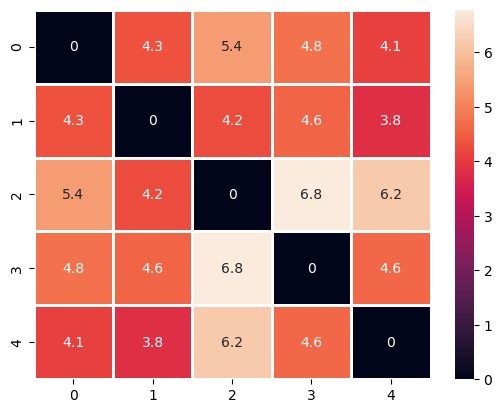

In [216]:
# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = my_kmeans.cluster_centers_

# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

# Plot distances on heatmap
sns.heatmap(centroid_distances,
            annot=True,
            linewidths=1);

In [217]:
songs_df_power.groupby(by="group").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
group,,,,,,,,,,,,,
0,0.428996,0.820369,-0.426184,0.075307,0.5,0.141655,-1.073679,1.290374,-0.172277,-1.106889,0.228905,1.443542,0.333333
1,-0.102761,-0.953299,0.880707,-0.469850,0.5,0.387182,1.030311,-0.846727,-0.291008,0.038996,0.503460,-0.263555,0.333333
2,-1.474176,-1.402469,0.012636,-1.476744,0.5,-0.645242,1.216003,1.144860,-0.232316,-1.057309,-1.617320,-1.053265,-1.333333
3,1.402915,0.693651,-0.233580,1.541487,-2.0,0.310288,-0.297979,-0.851862,-1.013164,1.112094,-0.409816,0.016405,0.333333
4,-0.254975,0.841748,-0.233580,0.329800,0.5,-0.193883,-0.874656,-0.736645,1.708766,1.013109,1.294770,-0.143128,0.333333


## Cluster Analysis - Quantile transformer

In [218]:
my_kmeans.fit(songs_df_quantile)
my_kmeans.predict(songs_df_quantile)
songs_df_quantile["group"] = my_kmeans.predict(songs_df_quantile)
songs_df_quantile['group']

song_artist
My Band - D12                                                                              3
The Real Slim Shady - Eminem                                                               3
Águas De Março - Antônio Carlos Jobim                                                      1
The Girl From Ipanema - Stan Getz                                                          1
Paint It, Black - The Rolling Stones                                                       4
Sultans Of Swing - Dire Straits                                                            4
Space Raiders - Charlotte de Witte Remix - Eats Everything                                 0
In Silence - Amelie Lens                                                                   0
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby] - Johannes Brahms    2
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 - Frédéric Chopin       2
Name: group, dtype: int32

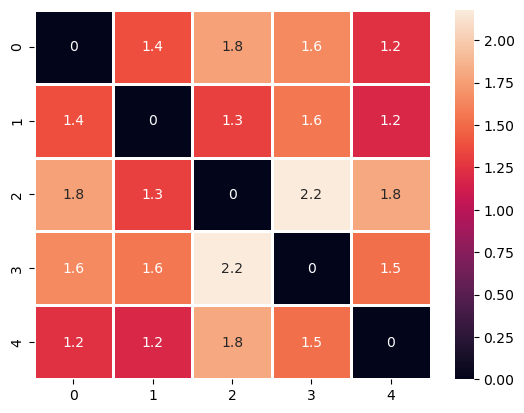

In [219]:
# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = my_kmeans.cluster_centers_

# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

# Plot distances on heatmap
sns.heatmap(centroid_distances,
            annot=True,
            linewidths=1);

In [220]:
songs_df_quantile.groupby(by="group").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
group,,,,,,,,,,,,,
0,0.722222,0.722222,0.333333,0.500000,1.0,0.555556,0.055556,0.833333,0.500000,0.111111,0.555556,0.944444,1.0
1,0.388889,0.277778,0.750000,0.277778,1.0,0.666667,0.722222,0.166667,0.277778,0.500000,0.666667,0.444444,1.0
2,0.055556,0.055556,0.500000,0.055556,1.0,0.277778,0.944444,0.833333,0.388889,0.222222,0.055556,0.166667,0.5
3,0.944444,0.722222,0.444444,0.944444,0.0,0.611111,0.388889,0.111111,0.388889,0.833333,0.277778,0.500000,1.0
4,0.388889,0.722222,0.444444,0.722222,1.0,0.388889,0.388889,0.500000,0.944444,0.833333,0.944444,0.444444,1.0


## Cluster Analysis - Standard scaling method

In [221]:
my_kmeans.fit(songs_df_standard)
my_kmeans.predict(songs_df_standard)
songs_df_standard["group"] = my_kmeans.predict(songs_df_standard)
songs_df_standard['group']

song_artist
My Band - D12                                                                              4
The Real Slim Shady - Eminem                                                               4
Águas De Março - Antônio Carlos Jobim                                                      1
The Girl From Ipanema - Stan Getz                                                          1
Paint It, Black - The Rolling Stones                                                       3
Sultans Of Swing - Dire Straits                                                            3
Space Raiders - Charlotte de Witte Remix - Eats Everything                                 0
In Silence - Amelie Lens                                                                   0
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby] - Johannes Brahms    2
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 - Frédéric Chopin       2
Name: group, dtype: int32

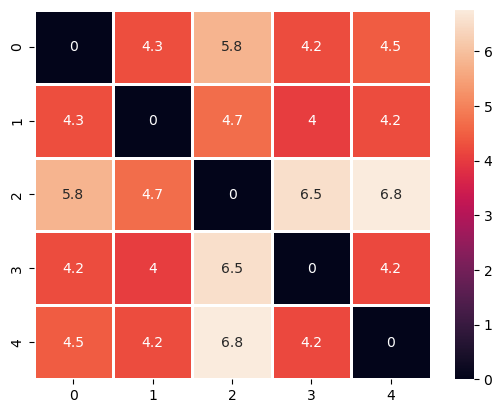

In [222]:
# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = my_kmeans.cluster_centers_

# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

# Plot distances on heatmap
sns.heatmap(centroid_distances,
            annot=True,
            linewidths=1);

In [223]:
songs_df_standard.groupby(by="group").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
group,,,,,,,,,,,,,
0,0.501113,0.808216,-0.427121,0.295979,0.5,0.149869,-1.013155,1.358299,-0.396051,-1.074185,0.353442,1.406271,0.333333
1,0.036353,-0.850511,0.996616,-0.242108,0.5,0.627898,1.002574,-0.814040,-0.451521,-0.055991,0.552757,-0.243601,0.333333
2,-1.601812,-1.493998,-0.189832,-1.723434,0.5,-0.674122,1.306279,1.039767,-0.423786,-1.034519,-1.791120,-1.074673,-1.333333
3,-0.161516,0.827873,-0.189832,0.501357,0.5,-0.171689,-0.892991,-0.767946,1.947530,1.032355,1.087116,-0.131612,0.333333
4,1.225862,0.708420,-0.189832,1.168205,-2.0,0.068044,-0.402708,-0.816079,-0.676172,1.132339,-0.202195,0.043615,0.333333
